# KMT2D

In [1]:
import genophenocorr
import hpotk
from IPython.display import HTML, display
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.view import CohortViewable, StatsViewable
store = hpotk.configure_ontology_store()
import pandas as pd
pd.set_option('display.max_rows', None)
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

/Users/robin/PycharmProjects/genophenocorr/gpc_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Loaded HPO v2023-10-09
Using genophenocorr version 0.1.1dev


In [2]:
KTM2D_transcript_id = 'NM_003482.4'
KTM2D_protein_id = "NP_003473.3"

In [3]:
fpath_phenopackets = 'input'
cohort_creator = configure_caching_cohort_creator(hpo, timeout=20)
cohort = load_phenopacket_folder(fpath_phenopackets, cohort_creator)

Patients Created: 100%|██████████| 65/65 [00:00<00:00, 197.67it/s]
Validated under none policy
No errors or warnings were found


In [4]:
cohort_viewable = CohortViewable(hpo=hpo, top_phenotype_count=10, top_variant_count=10, transcript_id=KTM2D_transcript_id)
html = cohort_viewable.process(cohort=cohort)
display(HTML(html))

HPO Term,ID,Annotation Count
Depressed nasal tip,HP:0000437,36
Prominent fingertip pads,HP:0001212,30
Global developmental delay,HP:0001263,30
Long palpebral fissure,HP:0000637,25
Macrotia,HP:0000400,24
Highly arched eyebrow,HP:0002553,22
Intellectual disability,HP:0001249,21
Eversion of lateral third of lower eyelids,HP:0007655,18
Cleft palate,HP:0000175,17
Hearing impairment,HP:0000365,16


In [5]:
from genophenocorr.preprocessing import UniprotProteinMetadataService
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVTranscriptCoordinateService
pms = UniprotProteinMetadataService()
protein_metas = pms.annotate(KTM2D_protein_id)
txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(KTM2D_transcript_id)
from genophenocorr.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_metas = pms.annotate(KTM2D_protein_id)


In [6]:
from genophenocorr.view import ProteinVisualizable
protein_meta = protein_metas[0]
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

start  3574  end  3575
start  3527  end  3528
start  1378  end  1379
start  1554  end  1555
start  3524  end  3525
start  3540  end  3541
start  3581  end  3582
start  3527  end  3528
start  3944  end  3945
start  5431  end  5432
start  2702  end  2703
start  1251  end  1252
start  31  end  32
start  3581  end  3582
start  2098  end  2099
start  3527  end  3528
start  5480  end  5481
start  3552  end  3553
start  1997  end  1998
start  3879  end  3880
start  3574  end  3575
start  1308  end  1309
start  1751  end  1753
start  1031  end  1032
start  5424  end  5425
start  3541  end  3542
start  3838  end  3839
start  4209  end  4210
start  1744  end  1745
start  3581  end  3582
start  5499  end  5500
start  5424  end  5425
start  3541  end  3542
start  5424  end  5425
start  3541  end  3542
start  2879  end  2880
start  3054  end  3055
start  3563  end  3564
start  5431  end  5432
start  2198  end  2199
start  4102  end  4103
start  1924  end  1926
start  4801  end  4802
start  2733  en

Warning need to implement protein_length
1000.0
type <class 'numpy.ndarray'> 
type max_x_absolute <class 'int'> 
type <class 'numpy.ndarray'> 
type max_x_absolute <class 'int'> 
type <class 'numpy.ndarray'> 
type max_x_absolute <class 'int'> 
Drawing at marker =  0.15
Drawing at marker =  0.15377290693496226
Drawing at marker =  0.27953647143370464
Drawing at marker =  0.3072044556234279
Drawing at marker =  0.31437297879985626
Drawing at marker =  0.3231764283147682
Drawing at marker =  0.32330219187926695
Drawing at marker =  0.32883578871721164
Drawing at marker =  0.33399209486166004
Drawing at marker =  0.3377650017966223
Drawing at marker =  0.34531081566654687
Drawing at marker =  0.3692058929213079
Drawing at marker =  0.37008623787279915
Drawing at marker =  0.37071505569529284
Drawing at marker =  0.39184333453108156
Drawing at marker =  0.3948616600790513
Drawing at marker =  0.40102407473948976
Drawing at marker =  0.41372619475386274
Drawing at marker =  0.4263025512037369

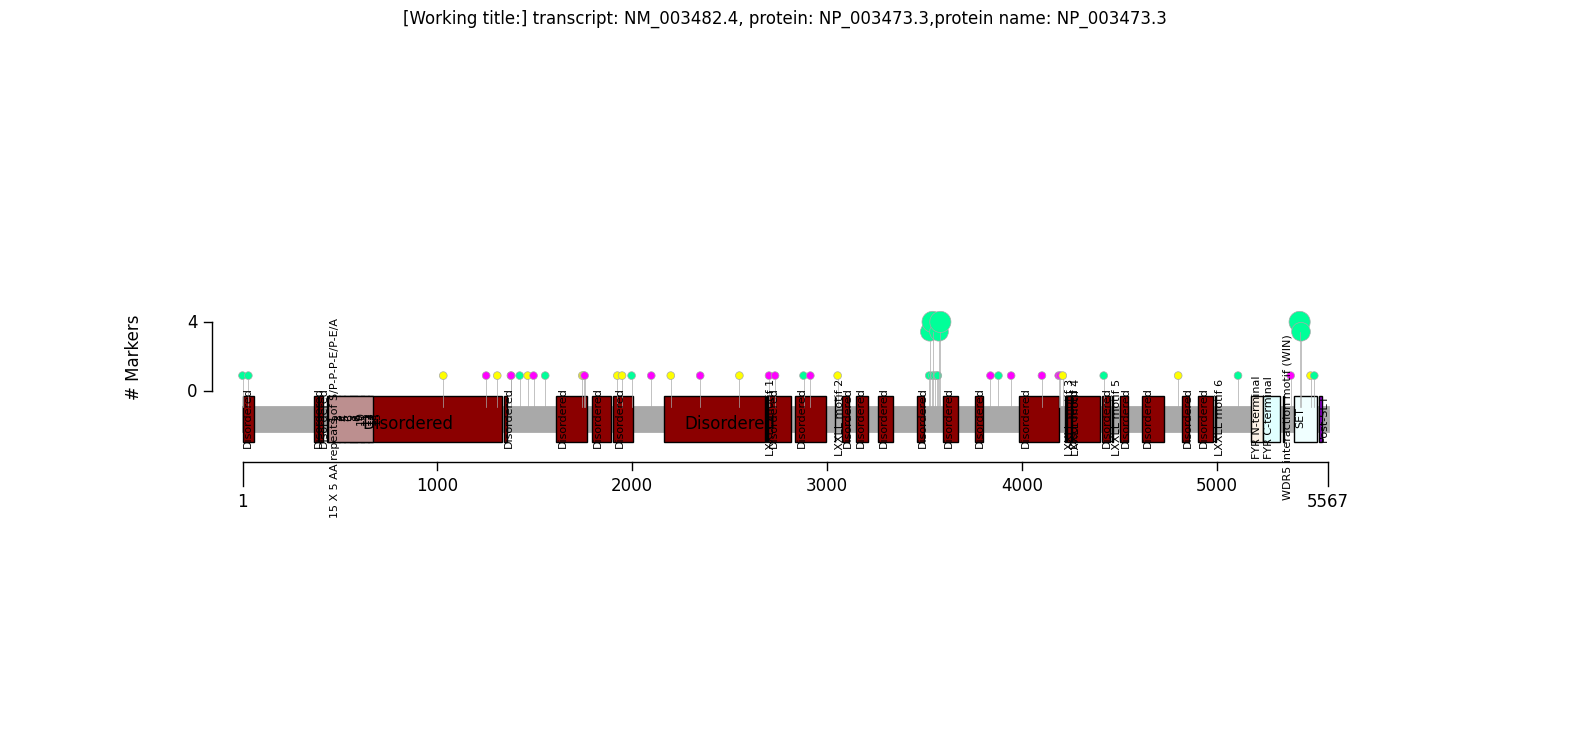

In [7]:
from genophenocorr.view import VariantDrawer
drawer = VariantDrawer()
drawer.draw_fig(pvis=pvis)

In [8]:
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.analysis.predicate import PatientCategories

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis_config.min_perc_patients_w_hpo = 0.1
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [9]:
from genophenocorr.model import VariantEffect

missense_var = analysis.compare_by_variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=KTM2D_transcript_id)
missense_var.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_003482.4                       Yes             No  \
                                                    Count Percent  Count   
Sensorineural hearing impairment [HP:0000407]        6/11     55%   0/13   
Hearing impairment [HP:0000365]                     14/19     74%   8/21   
Ventricular septal defect [HP:0001629]               0/15      0%   5/21   
High forehead [HP:0000348]                            5/6     83%    1/5   
Motor delay [HP:0001270]                              2/8     25%    2/2   
Hypotonia [HP:0001252]                                2/7     29%  10/14   
Hypoglycemia [HP:0001943]                             1/1    100%    0/5   
Patent ductus arteriosus [HP:0001643]                1/24      4%   4/21   
Decreased proportion of CD4-positive, alpha-bet...    6/8     75%    2/5   
Depressed nasal ridge [HP:0000457]                    1/5     20%    1/1   
Blue sclerae [HP:0000592]                             4/7     57%   3/10   
Highly arched eyebrow [HP:0002553]                    8/9     89%  14/21   
Atrial septal defect [HP:0001631]                     5/7     71%   6/13   
Eversion of lateral third of lower eyelids [HP:...    2/3     67%  16/18   
Sacral dimple [HP:0000960]                            0/2      0%   6/10   
Recurrent otitis media [HP:0000403]                  8/15     53%   6/17   
Decreased proportion of memory B cells [HP:0030...    6/8     75%    5/5   
Renal duplication [HP:0000075]                        0/5      0%    2/8   
Ptosis [HP:0000508]                                   0/7      0%   2/11   
Intellectual disability, mild [HP:0001256]           3/12     25%    1/2   
Long palpebral fissure [HP:0000637]                   8/8    100%  17/21   
Sparse lateral eyebrow [HP:0005338]                   6/7     86%    5/8   
Seizure [HP:0001250]                                  2/8     25%   2/17   
Congenital hip dislocation [HP:0001374]               1/7     14%   5/16   
Coarctation of aorta [HP:0001680]                    1/15      7%   3/21   
Clinodactyly of the 5th finger [HP:0004209]           2/9     22%   4/11   
Patent foramen ovale [HP:0001655]                    2/24      8%   3/20   
Proportionate short stature [HP:0003508]             7/11     64%    4/9   
Severe short stature [HP:0003510]                    7/12     58%   4/10   
Scoliosis [HP:0002650]                               6/19     32%   4/17   
Depressed nasal tip [HP:0000437]                    16/20     80%  20/27   
Feeding difficulties [HP:0011968]                    5/14     36%   3/11   
Abnormality of the face [HP:0000271]                26/26    100%  28/28   
Polyhydramnios [HP:0001561]                           1/1    100%    0/1   
Abnormal blood vessel morphology [HP:0033353]         3/3    100%    6/6   
Abnormal vascular morphology [HP:0025015]             3/3    100%    6/6   
Abnormal palmar dermatoglyphics [HP:0001018]          0/0      0%    2/2   
Midface retrusion [HP:0011800]                        1/1    100%    1/1   
Abnormality of the pulmonary veins [HP:0011718]       1/1    100%    0/0   
Abnormality of the musculoskeletal system [HP:0...  23/23    100%  26/26   
Abnormality of the vertebral column [HP:0000925]      6/6    100%  10/10   
Abnormal ear physiology [HP:0031704]                14/14    100%    8/8   
Abnormal hair pattern [HP:0010720]                    0/0      0%    2/2   
Hypoplastic nipples [HP:0002557]                     5/12     42%    0/0   
Abnormal cellular phenotype [HP:0025354]              4/4    100%    3/3   
Thick lower lip vermilion [HP:0000179]                3/3    100%    1/1   
Renal hypoplasia [HP:0000089]                         1/5     20%    0/0   
Global developmental delay [HP:0001263]             14/15     93%  16/17   
Abnormal immunoglobulin level [HP:0010701]            4/4    100%    3/3   
Abnormality of skull size [HP:0000240]                3/3    100%    4/4   
Decreased circulating IgG subclass level [HP:00.

In [10]:
analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis_config.min_perc_patients_w_hpo = 0.1
analysis_config.heuristic_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [11]:
missense_var = analysis.compare_by_variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=KTM2D_transcript_id)
missense_var.summarize(hpo, PatientCategories.YES)

ZeroDivisionError: float division by zero

In [ ]:
mtc_report = missense_var.mtc_filter_report
sview = StatsViewable(hpo_mtc_report=mtc_report)
display(HTML(sview.process(cohort=missense_var)))
